# Explore Flair and spaCy NER Annotations in Book 4

Examining the outcomes of the various Named Entity Recognition systems yielded several observations:

- the quantity of entities identified by the three Flair models is nearly identical. spaCy, being a multi-class model, detected a larger number of annotations.
- Comparatively few differences were observed between Flair ner-large and Flair ner-large when employing the SegtokSentenceSplitter function; these discrepancies were not significant.
- Flair ner-large and spaCy-trf share certain resemblances in terms of place annotations: (1) a similar count of detected place entities, (2) a substantial level of Percentage Annotation Agreement, surpassing the PAA of Flair ner-large with Flair ner. This suggests that Flair ner-large and spaCy-trf exhibit agreement in annotations and share similar annotation styles.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
## open the output of Flair NER (18,664 rows)
NERs_Book4 = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/KU Leuven/PhD project 'Greek Spaces in Roman Times'/Data_Extraction/Outputs/2.2.BIO_NER_Flair_spaCy_Book4.csv")

In [3]:
len(NERs_Book4)

18664

# Reference Column

The plot shows the distribution of the number of annotations in each chapter of Book 4 using different NER models. We observe that the chapter with most annotations is chapter 18. In general, spaCy has more annotations than Flair. This is due to the fact that the spaCy is a multi-class model, while Flair is a 4-class model.

In total, NER systems detected the following number of annotations:

- spaCy-trf: 3,588
- spaCy-md: 3,412
- Flair ner-large + SegtokSentenceSplitter: 2,844
- Flair ner-large: 2,843
- Flair ner: 2,807

We observe that the number of annotation using three different Flair models is almost the same. The Flair ner model has a few annotations less than Flair ner large. The use Flair ner-large in combination with SegtokSentenceSplitter does not impact on the number of entities detected.

In [4]:
## get the chapter from each reference
column_chapter = [] ## create the list of chapters

for i, reference in enumerate(NERs_Book4["Reference"]): ## for each reference
    
    pattern = r"urn:cts:latinLit:phi0978\.phi001:4.(\d+)(?:\.(\d))?\." ## match the regex pattern
    match = re.search(pattern,reference)
    column_chapter.append(int(match[1])) ## extract the chapter

NERs_Book4["Chapter"]=column_chapter ## add the chapter column

In [5]:
unique_chapters = NERs_Book4["Chapter"].unique() ## extract the unique values from the chapter column

In [6]:
NER_models = ['BIO_Flair', 'BIO_Flair-large', "BIO_Flair_Splitter", "BIO_spaCy-md", 'BIO_spaCy-trf'] ## list all the model columns in the dataframe

dictionary = {} ## create an empty dictionary

for n in unique_chapters: ## for each chapter in Book 4
    
    counts = []
    
    selected_rows = NERs_Book4[NERs_Book4["Chapter"] == n] ## select all the tokens in the chapter
    
    for model in NER_models : ## for each model
        
        count_annotations = len(selected_rows[selected_rows[model] != 'O']) ## count all the annotations
        counts.append(count_annotations)
    
    dictionary[n] = counts

In [7]:
df = pd.DataFrame(dictionary) ## create a dataframe
tdf = df.T  ## transpose the dataframe
tdf.columns = NER_models ## rename the columns

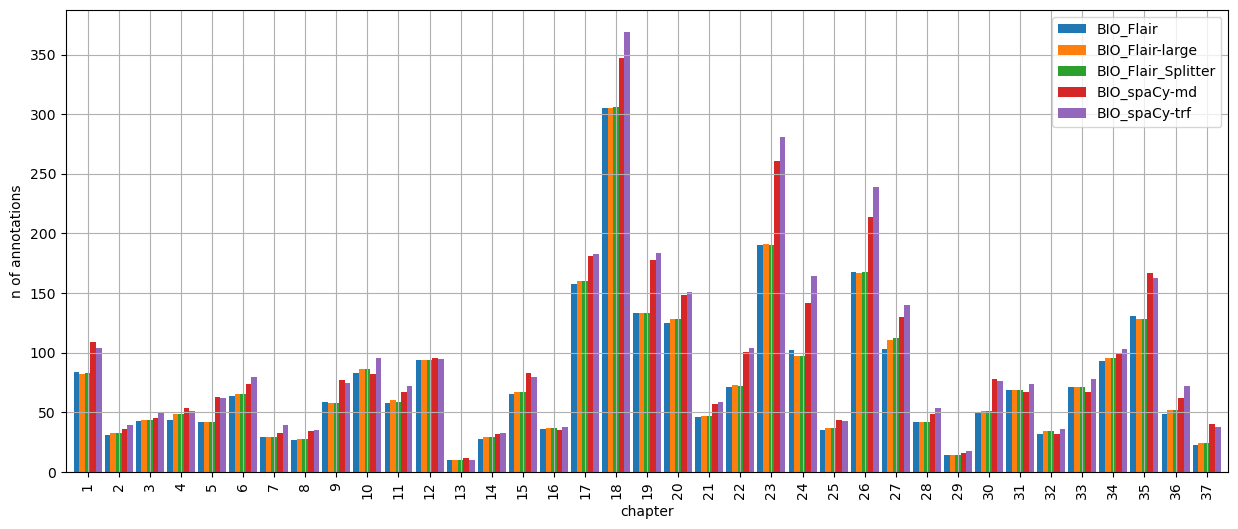

In [8]:
ax = tdf.plot(kind='bar', figsize=(15, 6), width=0.9) ## generate a plot

ax.set_xlabel("chapter")
ax.set_ylabel("n of annotations")
ax.grid(True)

In [9]:
tdf.sum() ## calculate the sum for each column

BIO_Flair             2807
BIO_Flair-large       2843
BIO_Flair_Splitter    2844
BIO_spaCy-md          3412
BIO_spaCy-trf         3588
dtype: int64

# Type Column

Comparing the three Flair models, variations are observed in the number of LOC (Location) labels assigned. The highest count is found in Flair ner-large (1,912), closely followed by Flair ner-large with SegtokSentenceSplitter (1,904), while there's a notable decrease in Flair ner (1,338). In terms of B-MISC (Miscellaneous) labels, Flair ner leads with 1,063 instances, whereas this count drops to 502 in Flair ner-large. The count of B-PER (Person) labels varies notably, ranging from 119 in Flair ner-large to 66 in Flair ner. Overall, Flair ner-large and Flair ner-large with SegtokSentenceSplitter exhibit similarities, but deviations are observed compared to Flair ner.

In spaCy, locations are categorized into two distinct labels: GPE (Geopolitical Entity), which includes cities, and LOC (Location), encompassing entities like mountains. When using the spaCy-md model, it identified 546 instances of B-GPE and 227 instances of B-LOC, totaling 773 place entities. Conversely, the spaCy-trf model recognized 1,053 B-GPE and 884 B-LOC entities, summing up to 1,937 entities. Furthermore, the number of B-PER entities detected was 529 in spaCy-md, compared to a reduced count of 104 in spaCy-trf. Finally, the number of B-ORG in spaCy-md was 565 and of B-NORP (Nationalities or Religious or Political Groups) was 221, while spaCy-trf identified 2 instances of B-ORG and 427 instances of B-NORP.

To sum up, the different models identified the following number of place entities:

- spaCy-trf: 1,937
- Flair ner-large: 1,912
- Flair ner-large + SegtokSentenceSplitter: 1,904
- Flair ner: 1,338
- spaCy-md: 773

Flair ner-large and spaCy-trf exhibit almost the same number of place entities.

_Here we counted B-LOC and B-GPE excluding I-LOC and I-GPE to compare the number of place entities detected, rather than the number of tokens labelled as 'place' by each model._

In [10]:
NER_models = ['BIO_Flair', 'BIO_Flair-large', "BIO_Flair_Splitter", "BIO_spaCy-md", 'BIO_spaCy-trf'] ## list all the model columns in the dataframe

for model in NER_models:
    
    count = NERs_Book4[model].value_counts() ## extract the unique values from the chapter column
    print(count)

O         15857
B-LOC      1338
B-MISC     1063
I-LOC       242
B-PER        66
I-MISC       46
B-ORG        24
I-ORG        15
I-PER        13
Name: BIO_Flair, dtype: int64
O         15821
B-LOC      1912
B-MISC      502
I-LOC       276
B-PER       119
I-PER        18
B-ORG         6
I-ORG         6
I-MISC        4
Name: BIO_Flair-large, dtype: int64
O         15820
B-LOC      1904
B-MISC      512
I-LOC       277
B-PER       120
I-PER        15
I-ORG         6
I-MISC        5
B-ORG         5
Name: BIO_Flair_Splitter, dtype: int64
O                15252
B-ORG              565
B-GPE              546
B-PERSON           529
B-LOC              227
B-NORP             221
I-LOC              217
I-QUANTITY         202
B-CARDINAL         193
B-QUANTITY         180
I-ORG              162
B-PRODUCT           95
B-FAC               42
I-PERSON            41
I-DATE              37
I-FAC               36
B-DATE              35
B-ORDINAL           33
I-GPE               20
I-CARDINAL          13
I-W

# Percentage Annotation Agreement 

We assessed the level of annotation agreement among various models. Two models exhibit agreement in their annotations when the entity labels (e.g., O, B-LOC, I-PER) match. Notably, Flair ner-large and Flair ner-large with SegtokSentenceSplitter demonstrate substantial agreement, with only 64 instances of disagreement. When comparing Flair ner and Flair ner-large, we observe agreement in 17,717 cases and divergence in 947 cases. Interestingly, Flair ner-large with SegtokSentenceSplitter exhibits closer resemblance to Flair ner, differing in only 929 cases.

Annotations from spaCy-md and spaCy-trf reveal notable dissimilarity, agreeing on 16,400 annotations but differing in 2,264 cases. Moreover, substantial dissimilarity exists between Flair ner-large and spaCy-trf, and even more pronounced differences emerge between Flair ner-large and spaCy-md. These distinctions across Flair and spaCy models primarily stem from variations in the label sets they employ.

To mitigate this divergence, we focused our analysis exclusively on place annotations, encompassing B-LOC, I-LOC, B-GPE, and I-GPE labels. For each model, we compiled a list containing tuples of the reference and start position of the tokens labeled as 'place'. These lists were subsequently compared to assess the Percentage Annotation Agreement. Agreement between two models was determined when the tuple appeared in both lists. In particular, Flair ner-large was compared with Flair ner and spaCy-trf.

We observed that the PAA is higher comparing Flair ner-large with spaCy-trf (81.7%) than Flair ner (63.3%), pinpointing that Flair ner-large and spaCy-trf have similar annotation styles (for instance, entitity boundaries).

In [11]:
agreement_Flairlarge_FlairSplitter = NERs_Book4['BIO_Flair-large'] == NERs_Book4['BIO_Flair_Splitter']
agreement_Flairlarge_FlairSplitter.value_counts()

True     18600
False       64
dtype: int64

In [12]:
agreement_Flairner_FlairSplitter = NERs_Book4['BIO_Flair'] == NERs_Book4['BIO_Flair_Splitter']
agreement_Flairner_FlairSplitter.value_counts()

True     17735
False      929
dtype: int64

In [13]:
agreement_Flairner_Flairnerlarge = NERs_Book4['BIO_Flair'] == NERs_Book4['BIO_Flair-large']
agreement_Flairner_Flairnerlarge.value_counts()

True     17717
False      947
dtype: int64

In [14]:
agreement_spaCymd_spaCytrf = NERs_Book4['BIO_spaCy-md'] == NERs_Book4['BIO_spaCy-trf']
agreement_spaCymd_spaCytrf.value_counts()

True     16400
False     2264
dtype: int64

In [15]:
agreement_Flairlarge_spaCytrf = NERs_Book4['BIO_Flair-large'] == NERs_Book4['BIO_spaCy-trf']
agreement_Flairlarge_spaCytrf.value_counts()

True     15808
False     2856
dtype: int64

In [16]:
agreement_Flairlarge_spaCymd = NERs_Book4['BIO_Flair-large'] == NERs_Book4['BIO_spaCy-md']
agreement_Flairlarge_spaCymd.value_counts()

True     15135
False     3529
dtype: int64

For each model, a list is generated that contains the tuples (reference,start position) of all the tokens annotated as 'B-LOC', 'I-LOC', 'B-GPE', 'I-GPE' by the model. The tuples do not contain the label (i.e., 'I-LOC'). In this way, it was possible to compare systems with different label sets such as Flair and spaCy.

In [17]:
NER_models = ['BIO_Flair', 'BIO_Flair-large', "BIO_Flair_Splitter", "BIO_spaCy-md", 'BIO_spaCy-trf'] ## list all the model columns in the dataframe
LOC_list = [] ## create an empty list

for model in NER_models: ## for each model
    
    model_list = [] ## create an empty list
    
    selected_rows = NERs_Book4[NERs_Book4[model].isin(['B-LOC', 'I-LOC', 'B-GPE', 'I-GPE'])] ## select all the LOC and GPE label
    selected_rows.reset_index(inplace=True)
    
    for i,LOC in enumerate(selected_rows['Token']):
        
        reference_startpos = (selected_rows['Reference'][i],selected_rows['Start_pos'][i])
        model_list.append(reference_startpos)
    
    LOC_list.append(model_list)

Example of a tuple contained in the list. It refers to the token at 4.1.1 starting at position 75 that is labeled as 'place' in the Flair model.

In [18]:
LOC_list[0][0]

('urn:cts:latinLit:phi0978.phi001:4.1.1', 75)

In [19]:
Flair_ner_set = set(LOC_list[0]) ## convert the list to a set
Flair_nerlarge_set = set(LOC_list[1])
Flair_spaCytrf_set = set(LOC_list[4])

**Annotation Agreement Flair ner and Flair ner-large**

In [20]:
agreement = Flair_ner_set.intersection(Flair_nerlarge_set) ## calculate the intersection
disagreement = Flair_ner_set.symmetric_difference(Flair_nerlarge_set) ## calculate the symmetric difference

At the intersection of the sets of Flair ner and Flair ner-large there are 1,462 elements (Flar ner ∩ Flair ner-large)

In [21]:
len(agreement)

1462

In total, there are 844 elements that are not in common (Flair ner Δ Flair ner-large).

For instance, (4.1.1, 9) is part of the disagreement list. It refers to the token 'Europe' that is annotated as I-MISC by Flair ner and as B-LOC by Flair ner-large.

In [22]:
len(disagreement)

844

The formula expresses the percentage of tuples in common in the two sets on the total number of tuples considered.

In [23]:
IAA = (len(agreement) / (len(agreement) + len(disagreement))) * 100

In [24]:
IAA

63.39982653946227

There are 726 tokens labeled as 'place' in Flair ner-large that are not labeled in Flair ner. 

In [25]:
len(Flair_nerlarge_set) - len(agreement)

726

**Annotation Agreement Flair ner-large and spaCy-trf**

In [26]:
agreement = Flair_nerlarge_set.intersection(Flair_spaCytrf_set) ## calculate the intersection
disagreement = Flair_nerlarge_set.symmetric_difference(Flair_spaCytrf_set) ## calculate the symmetric difference

In [27]:
len(agreement)

1971

In [28]:
len(disagreement)

441

In [29]:
IAA = (len(agreement) / (len(agreement) + len(disagreement))) * 100

In [30]:
IAA

81.71641791044776

In [31]:
len(Flair_nerlarge_set) - len(agreement)

217